In [1]:
library(GenomicRanges)
library(ggplot2)
library(Signac)
library(rtracklayer)


Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follow

In [2]:
peaks.nano.path   <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/nanoCT/peaks/macs2_0.01/H3K27me3_peaks.broadPeak'
peaks.scCT.path   <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/scCT/peaks/macs2_0.01/H3K27me3_peaks.broadPeak'
peaks.encode.path <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/encode/peaks/peaks_all_merged.bed'

blacklist <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed'

In [3]:
peaks.nano <- read.table(file = peaks.nano.path)
peaks.nano <- GRanges(seqnames = peaks.nano$V1, 
                      ranges = IRanges(start = peaks.nano$V2, end = peaks.nano$V3),
                      name = peaks.nano$V4,
                      score = peaks.nano$V5,
                      signalValue = peaks.nano$V7,
                      pvalue = peaks.nano$V8,
                      qvalue = peaks.nano$V9
                      )
                      

In [4]:
peaks.scCT <- read.table(file = peaks.scCT.path)
peaks.scCT <- GRanges(seqnames = peaks.scCT$V1, 
                      ranges = IRanges(start = peaks.scCT$V2, end = peaks.scCT$V3),
                      name = peaks.scCT$V4,
                      score = peaks.scCT$V5,
                      signalValue = peaks.scCT$V7,
                      pvalue = peaks.scCT$V8,
                      qvalue = peaks.scCT$V9
                      )
                      

In [5]:
peaks.encode <- rtracklayer::import(peaks.encode.path)

In [6]:
peaks.nano
peaks.scCT
peaks.encode

GRanges object with 31687 ranges and 5 metadata columns:
            seqnames              ranges strand |                name     score
               <Rle>           <IRanges>  <Rle> |         <character> <integer>
      [1] GL456216.1         13691-17549      * |     H3K27me3_peak_1        75
      [2] GL456350.1       220897-224982      * |     H3K27me3_peak_2        53
      [3] GL456392.1         21859-23453      * |     H3K27me3_peak_3       255
      [4] JH584293.1            238-7567      * |     H3K27me3_peak_4        59
      [5] JH584293.1         85155-86286      * |     H3K27me3_peak_5        59
      ...        ...                 ...    ... .                 ...       ...
  [31683]       chrX 169827022-169833161      * | H3K27me3_peak_31683        48
  [31684]       chrX 169838065-169973168      * | H3K27me3_peak_31684        49
  [31685]       chrX 169986962-169989738      * | H3K27me3_peak_31685        27
  [31686]       chrX 169994677-169998422      * | H3K27me3_peak

GRanges object with 24027 ranges and 5 metadata columns:
            seqnames            ranges strand |                name     score
               <Rle>         <IRanges>  <Rle> |         <character> <integer>
      [1] GL456216.1       13729-17498      * |     H3K27me3_peak_1       169
      [2] GL456233.1     105814-111565      * |     H3K27me3_peak_2        41
      [3] GL456350.1         5490-8597      * |     H3K27me3_peak_3        29
      [4] GL456350.1       61188-63155      * |     H3K27me3_peak_4        31
      [5] GL456350.1       79987-83082      * |     H3K27me3_peak_5        36
      ...        ...               ...    ... .                 ...       ...
  [24023]       chrY 90737944-90756048      * | H3K27me3_peak_24023       237
  [24024]       chrY 90761105-90777262      * | H3K27me3_peak_24024       172
  [24025]       chrY 90783935-90813303      * | H3K27me3_peak_24025        92
  [24026]       chrY 90824838-90828560      * | H3K27me3_peak_24026        78
  [2402

GRanges object with 28080 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]     chr1     4487539-4489576      *
      [2]     chr1     4489716-4491148      *
      [3]     chr1     4491645-4493922      *
      [4]     chr1     4494137-4495457      *
      [5]     chr1     4495633-4496862      *
      ...      ...                 ...    ...
  [28076]     chrX 169980715-169981216      *
  [28077]     chrX 169981379-169982366      *
  [28078]     chrX 169982521-169982954      *
  [28079]     chrX 169985842-169986098      *
  [28080]     chrX 169988801-169989435      *
  -------
  seqinfo: 20 sequences from an unspecified genome; no seqlengths

In [7]:
# Encode peaks are very narrow, so extend them by 5kb on each side

peaks.encode.extended <- Extend(peaks.encode,upstream = 5000,downstream = 5000)

Warning message in Extend(peaks.encode, upstream = 5000, downstream = 5000):
“'*' ranges were treated as '+'”


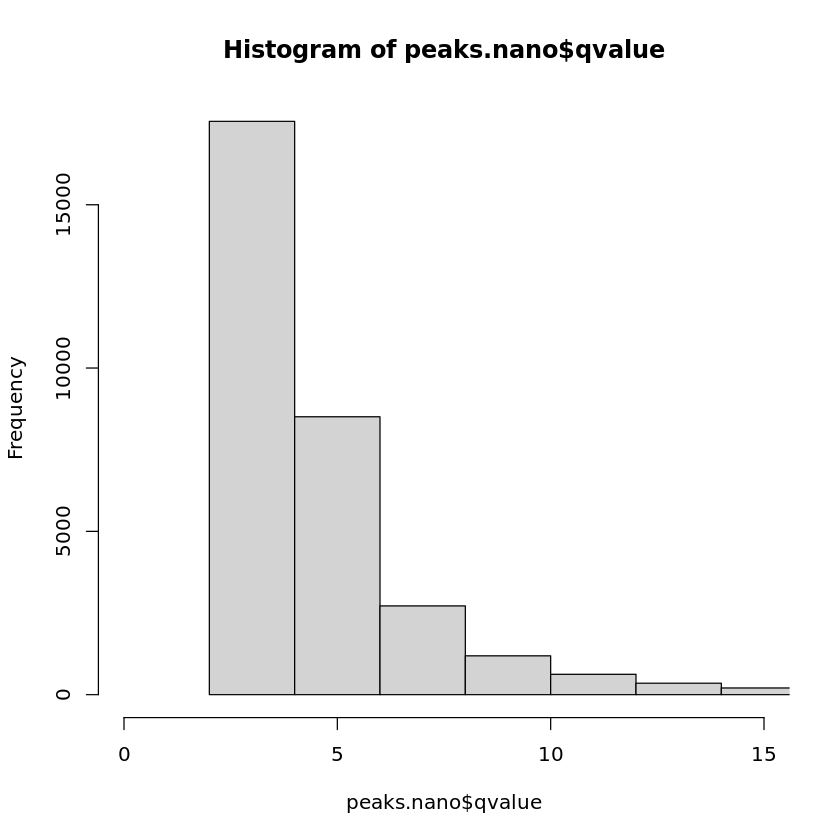

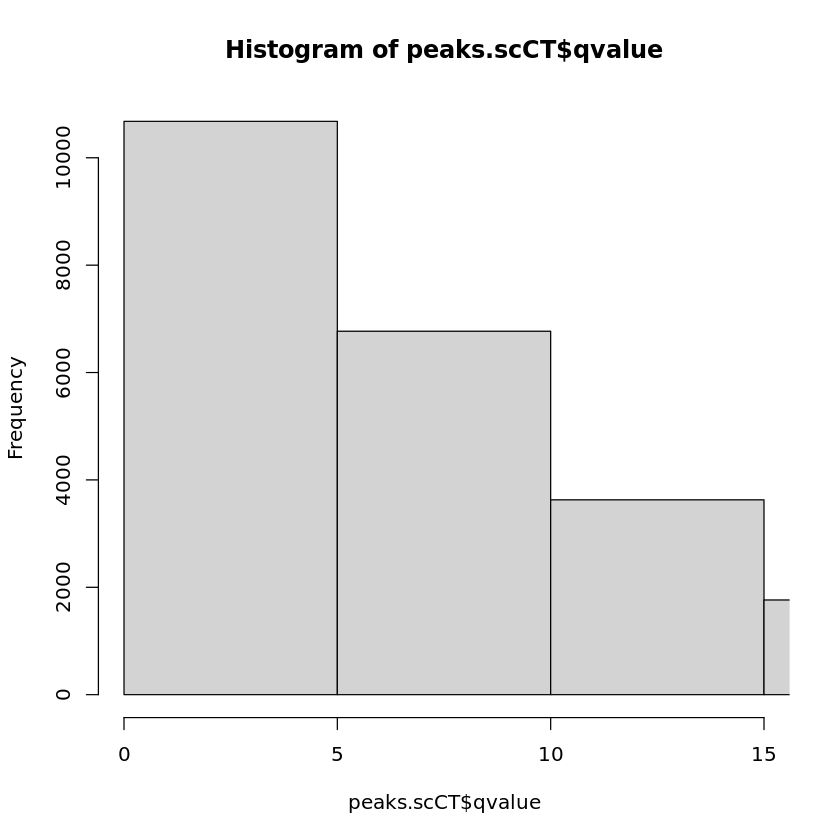

In [8]:
hist(peaks.nano$qvalue,breaks=100,xlim=c(0,15))
hist(peaks.scCT$qvalue,breaks=100,xlim=c(0,15))


In [9]:
cutoffs <- seq(1,16,0.5)
cutoffs


[1]  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0
[16]  8.5  9.0  9.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5
[31] 16.0

In [10]:
result.nano <- list()
result.nano <- data.frame(precision=0,recall=0,TP=0,FN=0,FP=0)

for(cutoff in cutoffs){
    peaks.nano.x <- peaks.nano[peaks.nano$qvalue > cutoff,]

    TP    <- subsetByOverlaps(x = peaks.encode.extended, peaks.nano.x)                     # TP
    FN    <- subsetByOverlaps(x = peaks.encode.extended, peaks.nano.x,invert=TRUE)         # FN
     
    XX    <- subsetByOverlaps(x = peaks.nano.x, peaks.encode.extended)                     # 
    FP    <- subsetByOverlaps(x = peaks.nano.x, peaks.encode.extended,invert=TRUE)         # FP
    
    
    precision    <- length(TP) / (length(TP) + length(FP))   # TP/(TP+FP)
    recall       <- length(TP) / (length(TP) + length(FN))   # TP/(TP+FN)
    
    # print(c(precision,recall))
    result.nano <- rbind(result.nano,c(precision,recall,length(TP),length(FN),length(FP)))
}

result.nano <- result.nano[-1,]

In [11]:
result.sc <- data.frame(precision=0,recall=0,TP=0,FN=0,FP=0)

for(cutoff in cutoffs){
    peaks.sc.x <- peaks.scCT[peaks.scCT$qvalue > cutoff,]

    
    TP    <- subsetByOverlaps(x = peaks.encode.extended, peaks.sc.x)                     # TP
    FN    <- subsetByOverlaps(x = peaks.encode.extended, peaks.sc.x,invert=TRUE)         # FN
     
    XX    <- subsetByOverlaps(x = peaks.sc.x, peaks.encode.extended)                     # 
    FP    <- subsetByOverlaps(x = peaks.sc.x, peaks.encode.extended,invert=TRUE)         # FP
    
    
    precision    <- length(TP) / (length(TP) + length(FP))   # TP/(TP+FP)
    recall       <- length(TP) / (length(TP) + length(FN))   # TP/(TP+FN)
    
    result.sc <- rbind(result.sc,c(precision,recall,length(TP),length(FN),length(FP)))
}

result.sc <- result.sc[-1,]

In [12]:
colnames(result.nano) <- c('precision','recall','True_positive','False_negetive','False_positive')
colnames(result.sc) <- c('precision','recall','True_positive','False_negetive','False_positive')

rownames(result.nano) <- cutoffs
rownames(result.sc) <- cutoffs

result.nano$qvalue <- rownames(result.nano)
result.sc$qvalue <- rownames(result.sc)

result.nano$method <- 'nano-CT'
result.sc$method <- 'scCT'

print(result.nano)
print(result.sc)

     precision    recall True_positive False_negetive False_positive qvalue
1    0.5108352 0.8907051         25011           3069          23950      1
1.5  0.5108352 0.8907051         25011           3069          23950    1.5
2    0.5108352 0.8907051         25011           3069          23950      2
2.5  0.5316737 0.8784544         24667           3413          21728    2.5
3    0.5858598 0.8436966         23691           4389          16747      3
3.5  0.6467544 0.7965812         22368           5712          12217    3.5
4    0.7008148 0.7381766         20728           7352           8849      4
4.5  0.7515099 0.6824074         19162           8918           6336    4.5
5    0.7905840 0.6219373         17464          10616           4626      5
5.5  0.8227979 0.5655271         15880          12200           3420    5.5
6    0.8511915 0.5253561         14752          13328           2579      6
6.5  0.8714002 0.4838319         13586          14494           2005    6.5
7    0.89083

In [13]:
result.both        <- rbind(result.nano,result.sc)
print(result.both)

      precision    recall True_positive False_negetive False_positive qvalue
1     0.5108352 0.8907051         25011           3069          23950      1
1.5   0.5108352 0.8907051         25011           3069          23950    1.5
2     0.5108352 0.8907051         25011           3069          23950      2
2.5   0.5316737 0.8784544         24667           3413          21728    2.5
3     0.5858598 0.8436966         23691           4389          16747      3
3.5   0.6467544 0.7965812         22368           5712          12217    3.5
4     0.7008148 0.7381766         20728           7352           8849      4
4.5   0.7515099 0.6824074         19162           8918           6336    4.5
5     0.7905840 0.6219373         17464          10616           4626      5
5.5   0.8227979 0.5655271         15880          12200           3420    5.5
6     0.8511915 0.5253561         14752          13328           2579      6
6.5   0.8714002 0.4838319         13586          14494           2005    6.5

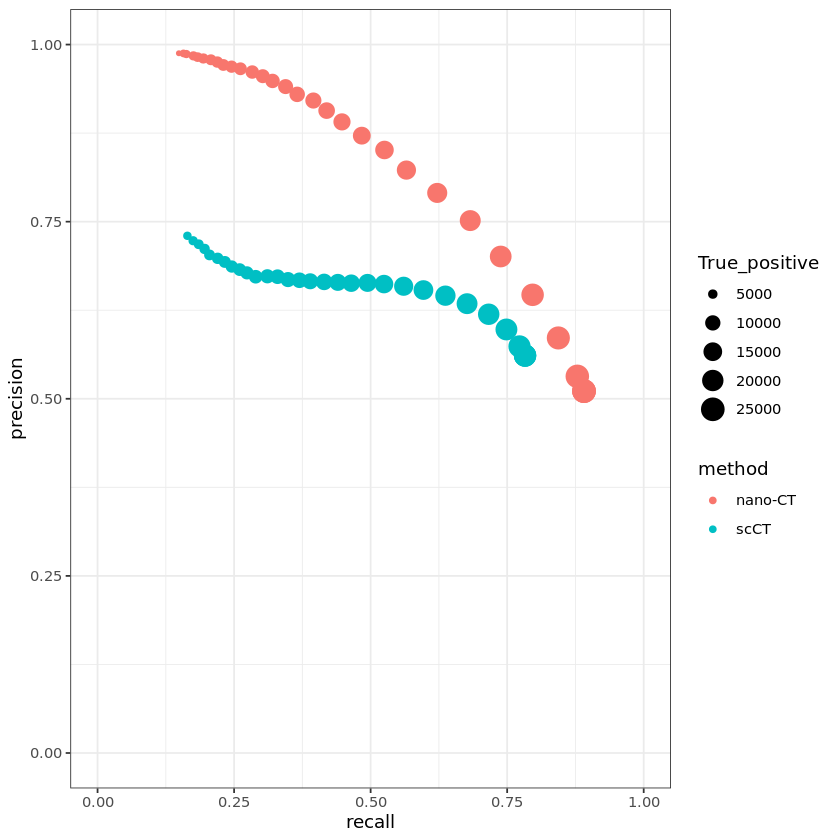

In [14]:
ggplot(data=result.both) + 
  geom_point(aes(x=recall, y= precision,size = True_positive, color=method)) + 
  theme_bw() + 
  coord_cartesian(xlim=c(0,1),ylim=c(0,1))

In [15]:
#scCT no-recall peaks
scCT.norecall.q15 <- subsetByOverlaps(x = peaks.scCT[peaks.scCT$qvalue > 15], peaks.encode.extended,invert=TRUE)
scCT.norecall.q10 <- subsetByOverlaps(x = peaks.scCT[peaks.scCT$qvalue > 10], peaks.encode.extended,invert=TRUE)

# nanoCT no-recall peaks
nanoCT.norecall.q5 <- subsetByOverlaps(x = peaks.nano[peaks.nano$qvalue > 5], peaks.encode.extended,invert=TRUE)
nanoCT.norecall.q10 <- subsetByOverlaps(x = peaks.nano[peaks.nano$qvalue > 10], peaks.encode.extended,invert=TRUE)


#scCT yes-recall peaks
scCT.yesrecall.q15 <- subsetByOverlaps(x = peaks.scCT[peaks.scCT$qvalue > 15], peaks.encode.extended)
scCT.yesrecall.q10 <- subsetByOverlaps(x = peaks.scCT[peaks.scCT$qvalue > 10], peaks.encode.extended)

# nanoCT yes-recall peaks
nanoCT.yesrecall.q5 <- subsetByOverlaps(x = peaks.nano[peaks.nano$qvalue > 5], peaks.encode.extended)
nanoCT.yesrecall.q10 <- subsetByOverlaps(x = peaks.nano[peaks.nano$qvalue > 10], peaks.encode.extended)






In [16]:
# Encode peaks overlap with scCT q10 peaks
encode.norecall.q10  <- subsetByOverlaps(x = peaks.encode.extended, peaks.scCT[peaks.scCT$qvalue > 10], invert=TRUE)
encode.yesrecall.q10 <- subsetByOverlaps(x = peaks.encode.extended, peaks.scCT[peaks.scCT$qvalue > 10])

length(encode.norecall.q10)
length(encode.yesrecall.q10)



[1] 18825

[1] 9255

In [17]:
op <- findOverlaps(subject = peaks.encode.extended,query= peaks.scCT[peaks.scCT$qvalue > 10])
s.hits <- subjectHits(op)

encode.yesrecall.q10 <- peaks.encode[s.hits]
encode.norecall.q10  <- peaks.encode[-s.hits]

In [18]:
# # Encode peaks overlap with scCT q10 peaks
# encode.norecall.q10  <- subsetByOverlaps(x = peaks.encode.extended, peaks.nano[peaks.nano$qvalue > 10], invert=TRUE)
# encode.yesrecall.q10 <- subsetByOverlaps(x = peaks.encode.extended, peaks.nano[peaks.nano$qvalue > 10])

# length(encode.norecall.q10)
# length(encode.yesrecall.q10)



In [19]:
dir.create('/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/')

rtracklayer::export(object = scCT.norecall.q10,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/scCT_norecall_q10.bed',format='bed')
rtracklayer::export(object = scCT.norecall.q15,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/scCT_norecall_q15.bed',format='bed')

rtracklayer::export(object = nanoCT.norecall.q5,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/nanoCT_norecall_q5.bed',format='bed')
rtracklayer::export(object = nanoCT.norecall.q10,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/nanoCT_norecall_q10.bed',format='bed')

rtracklayer::export(object = scCT.yesrecall.q10,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/scCT_yesrecall_q10.bed',format='bed')
rtracklayer::export(object = scCT.yesrecall.q15,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/scCT_yesrecall_q15.bed',format='bed')

rtracklayer::export(object = nanoCT.yesrecall.q5,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/nanoCT_yesrecall_q5.bed',format='bed')
rtracklayer::export(object = nanoCT.yesrecall.q10,con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/nanoCT_yesrecall_q10.bed',format='bed')

rtracklayer::export(object = encode.norecall.q10, con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_norecall_q10.bed',format='bed')
rtracklayer::export(object = encode.yesrecall.q10, con = '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_yesrecall_q10.bed',format='bed')

Warning message in dir.create("/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/"):
“'/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks' already exists”


In [20]:
encode.files   <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/encode/bigwig/all_merged.bw'
nbiotech.files <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/nbiotech_data/merged/bw/nbiotech_merged.bw'
nanoCT.files   <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/multimodal_data/single_modality/H3K27me3/bam/possorted_bam_sampleID.bw'

peaks.norecall.file  <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_norecall_q10.bed'
peaks.yesrecall.file <- '/data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_yesrecall_q10.bed'

In [21]:
cmd.nbiotech <- paste0('computeMatrix ', 
       'reference-point ',
       '-S ',
        paste0(nbiotech.files,collapse = ' '),
       ' -R ',
       peaks.norecall.file,
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_norecall_peaks_nbiotech_bw_matrix.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000',
       '-bl ', blacklist)

cmd.nano <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
       paste0(nanoCT.files,collapse = ' '),
       ' -R ',
       peaks.norecall.file,
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_norecall_peaks_nano_bw_matrix.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000',
       '-bl ', blacklist)

cmd.encode <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
       paste0(encode.files,collapse = ' '),
       ' -R ',
       peaks.norecall.file,
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_norecall_peaks_encode_bw_matrix.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000',
       '-bl ', blacklist)

cmd.nbiotech2 <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
        paste0(nbiotech.files,collapse = ' '),
       ' -R ',
       peaks.yesrecall.file,
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_yesrecall_peaks_nbiotech_bw_matrix.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000',
       '-bl ', blacklist)

cmd.nano2 <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
       paste0(nanoCT.files,collapse = ' '),
       ' -R ',
       peaks.yesrecall.file,
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_yesrecall_peaks_nano_bw_matrix.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000',
       '-bl ', blacklist)

cmd.encode2 <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
       paste0(encode.files,collapse = ' '),
       ' -R ',
       peaks.yesrecall.file,
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_yesrecall_peaks_encode_bw_matrix.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000',
       '-bl ', blacklist)



In [22]:
paste(cmd.nano,cmd.nbiotech, cmd.encode,cmd.nano2, cmd.nbiotech2,cmd.encode2,' &',sep=' & ')

[1] "computeMatrix  reference-point  -S /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/multimodal_data/single_modality/H3K27me3/bam/possorted_bam_sampleID.bw -R /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_norecall_q10.bed -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_norecall_peaks_nano_bw_matrix.txt.gz  -p 8  --upstream 10000 --downstream 20000-bl /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed & computeMatrix reference-point -S /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/nbiotech_data/merged/bw/nbiotech_merged.bw -R /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_norecall_q10.bed -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_norecall_peaks_nbiotech_bw_matrix.txt.gz  -p 8  --upstream 10000 --downstream 20000-bl /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed & computeMatrix  reference-point  -S /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/encode/bigwig/all_merged.bw -R /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_norecall_q10.bed -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_norecall_peaks_encode_bw_matrix.txt.gz  -p 8  --upstream 10000 --downstream 20000-bl /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed & computeMatrix  reference-point  -S /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/multimodal_data/single_modality/H3K27me3/bam/possorted_bam_sampleID.bw -R /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_yesrecall_q10.bed -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_yesrecall_peaks_nano_bw_matrix.txt.gz  -p 8  --upstream 10000 --downstream 20000-bl /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed & computeMatrix  reference-point  -S /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/nbiotech_data/merged/bw/nbiotech_merged.bw -R /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_yesrecall_q10.bed -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_yesrecall_peaks_nbiotech_bw_matrix.txt.gz  -p 8  --upstream 10000 --downstream 20000-bl /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed & computeMatrix  reference-point  -S /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/encode/bigwig/all_merged.bw -R /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/missing_peaks/encode_yesrecall_q10.bed -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/encode_yesrecall_peaks_encode_bw_matrix.txt.gz  -p 8  --upstream 10000 --downstream 20000-bl /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/mm10-blacklist.v2.bed &  &"

In [23]:
cmd.nbiotech3 <- paste0('computeMatrix ', 
       'reference-point ',
       '-S ',
        paste0(nbiotech.files,collapse = ' '),
       ' -R ',
       paste(c(peaks.nano.path,peaks.scCT.path,peaks.encode.path,collapse=' ')),
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/all_peaks_metagene_nbiotech_bw.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000')

cmd.nano3 <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
       paste0(nanoCT.files,collapse = ' '),
       ' -R ',
       paste(c(peaks.nano.path,peaks.scCT.path,peaks.encode.path,collapse=' ')),
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/all_peaks_metagene_nanoCT_bw.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000')

cmd.encode3 <- paste0('computeMatrix ', 
       ' reference-point ',
       ' -S ',
       paste0(encode.files,collapse = ' '),
       ' -R ',
       paste(c(peaks.nano.path,peaks.scCT.path,peaks.encode.path,collapse=' ')),
       ' -o /data/proj/GCB_MB/bcd_CT/single-cell/results2/results/precision_recall/all_peaks_metagene_encode_bw.txt.gz ',
       ' -p 8 ', 
       ' --upstream 10000 --downstream 20000')


In [24]:
length(peaks.nano)
length(peaks.scCT)
length(peaks.encode)


[1] 31687

[1] 24027

[1] 28080